# Task #2 : Prediction using Unsupervised ML
# Creater : Satvik
## Predict the optimum number of clusters in Iris dataset and represent it visually.

### K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering.

### Problem statement:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Import required libraries

In [2]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from  sklearn.cluster import KMeans
from sklearn import datasets

### Load Daatset
● Data can be found at https://bit.ly/3kXTdox

In [3]:
# Reading data from remote link
# url = " https://bit.ly/3kXTdox"
# df = pd.read_csv(url)
# OR

# Reading data from csv file
# Removal of Id column as it is not required for data analysis i.e clustering
df = pd.read_csv('Iris.csv').iloc[ : , 1:]
# OR

# iris = datasets.load_iris()
# df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data imported successfully")

df.head()

Data imported successfully


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Getting the information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df_new = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Exploratory Data Analysis**

In [10]:
s1=StandardScaler()
df_new1=s1.fit_transform(df_new)

In [11]:
df_std=pd.DataFrame(df_new1,columns=list(df_new.columns))

**Output of function scale is matrix , we need to convert it back to data frame in order to keep on using it as data frame.**

In [12]:
df_std.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [13]:
df_std.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


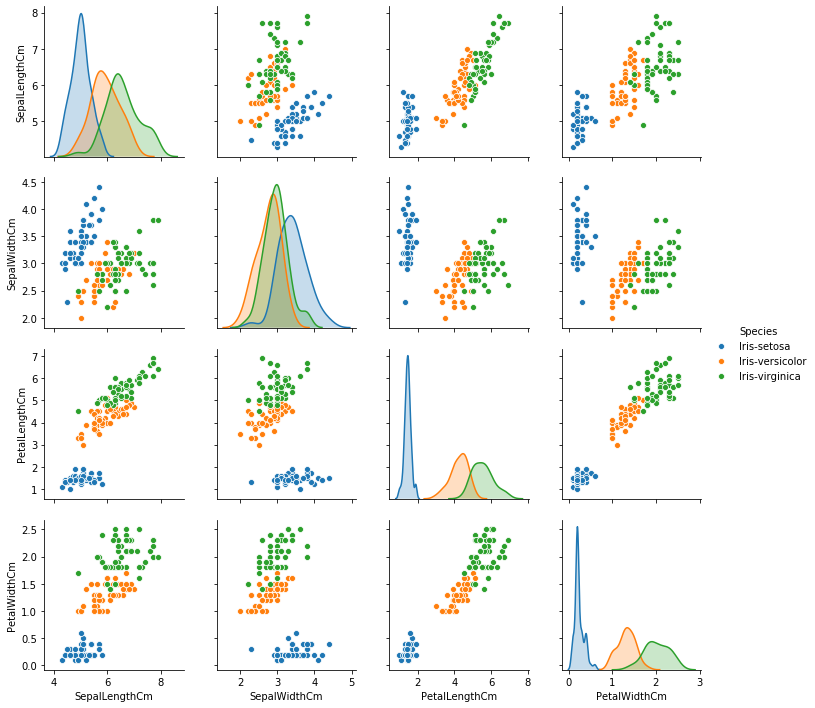

In [14]:
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue="Species", 
             diag_kind="kde")

### Handling of categorical data

In [20]:
y = df.iloc[ : , -1].values
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Data Modeling
### K-means
**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = df_std.iloc[:, [0, 1, 2, 3]].values

wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 123)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Plotting the Elbow Curve which represents the cluster**

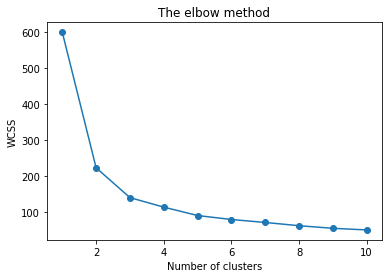

In [15]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.


In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 123)

y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Visualising the clusters with centroids

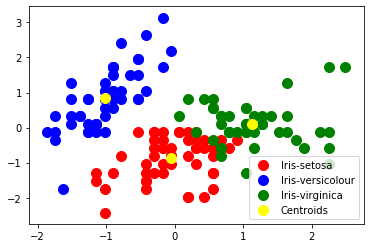

In [17]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Visualization of "Iris flower dataset" with optimum 3 clusters

,Color,Iris species
0,purple,setosa
1,blue,versicolor
2,yellow,virginica


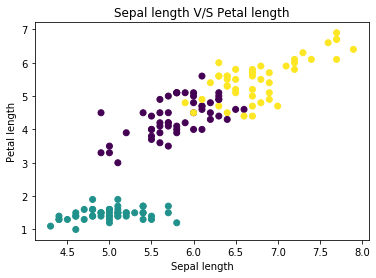

In [18]:
plt.scatter(x='SepalLengthCm', y='PetalLengthCm', data=df, c=y_kmeans)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Sepal length V/S Petal length')

pd.DataFrame({'Color':['purple', 'blue', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

,Color,Iris species
0,purple,setosa
1,blue,versicolor
2,yellow,virginica


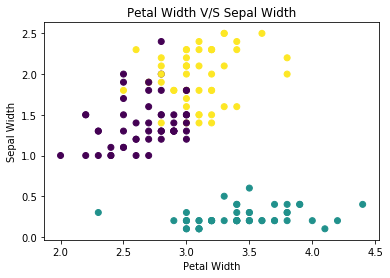

In [19]:
plt.scatter(x='SepalWidthCm', y='PetalWidthCm', data=df, c=y_kmeans)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Petal Width V/S Sepal Width')

pd.DataFrame({'Color':['purple', 'blue', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

### Difference in predicted and actual clustering values

In [21]:
pd.DataFrame({'Predicted':y_kmeans,'Actual':y}).T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Predicted,1,1,1,1,1,1,1,1,1,1,...,2,2,0,2,2,2,0,2,2,0
Actual,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


Text(0.5, 1.0, 'Actual')

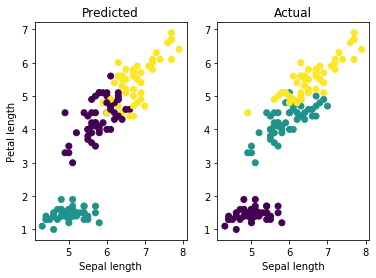

In [22]:
fig, axes = plt.subplots(1,2)

axes[0].scatter(x='SepalLengthCm', y='PetalLengthCm', data=df, c=y_kmeans)
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Petal length')
axes[0].set_title('Predicted')

axes[1].scatter(x='SepalLengthCm', y='PetalLengthCm', data=df, c=y)
axes[1].set_xlabel('Sepal length')
axes[1].set_title('Actual')

### Direct cluster analysis using Seaborn

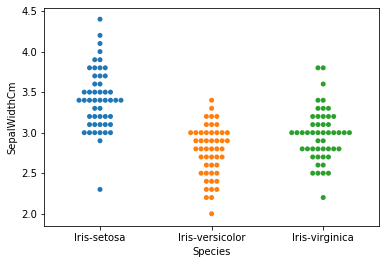

In [23]:
sns.swarmplot(x='Species', y='SepalWidthCm', data=df)

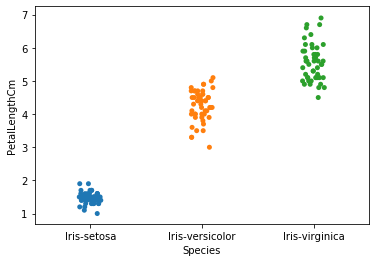

In [24]:
sns.stripplot(x='Species', y='PetalLengthCm', data=df)

# Thank you